<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-1:-Uninformed-Search" data-toc-modified-id="Assignment-1:-Uninformed-Search-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 1: Uninformed Search</a></span></li><li><span><a href="#Required-Code" data-toc-modified-id="Required-Code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Required Code</a></span></li><li><span><a href="#Example-1" data-toc-modified-id="Example-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example 2</a></span></li><li><span><a href="#Required-Modification-to-the-Grid-Puzzle-(worth-20-points)" data-toc-modified-id="Required-Modification-to-the-Grid-Puzzle-(worth-20-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Required Modification to the Grid Puzzle (worth 20 points)</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra Credit</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Grading</a></span></li><li><span><a href="#Check-in" data-toc-modified-id="Check-in-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Check-in</a></span></li></ul></div>

# Assignment 1: Uninformed Search

* *A1.1: First paragraph is changed. It no longer mentions a requirement of applying your search functions to a puzzle of your choice.*

Yibo Xu

Breadth-first and depth-first are two algorithms for performing
uninformed search---a search that does not use
knowledge about the goal of the search.  You will implement both
search algorithms in python and test them on a simple graph.  Then you
will apply your search algorithms to the grid navigation problem that you modify
as explained below.

# Required Code

In this jupyter notebook, you must implement at least the following functions.  The first function, `search`, implements the algorithm shown at the end of Lecture Notes `03 Problem-Solving Agents`.

`solution_path = search(start_state, goal_state, successors_f, breadth_first)`
* `start_state`: single state where search starts
* `goal_state`: signle state that represents the goal
* `successors_f`: function that accepts a single argument that is a state and returns a list of states that can be reached in one step from the argument state
* `breadth_first`: `True` or `False`.  If `True`, `search` performs a breadth-first search. Otherwise it performs a depth-first search.
* `solution_path`: returned value that is either<br>
  * a list of states that shows the path found from the start state to the goal state, or<br>
  * the string `'Goal not found'` if the search has searched everywhere without finding the goal state.

The next two functions are very short, and just call `search`.  These are really just convenience functions so the user of your search algorithm does not need to know what the boolean-valued argument `breadth_first` means.

`solution_path = breadth_first_search(start_state, goal_state, successors_f)`
* `start_state`: single state where search starts
* `goal_state`: signle state that represents the goal
* `successors_f`: function that accepts a single argument that is a state and returns a list of states that can be reached in one step from the argument state
* `solution_path`: returned value that is either<br>
  * a list of states that shows the path found from the start state to the goal state, or<br>
  * the string `'Goal not found'` if the search has searched everywhere without finding the goal state.


`solution_path = depth_first_search(start_state, goal_state, successors_f)`
* `start_state`: single state where search starts
* `goal_state`: signle state that represents the goal
* `successors_f`: function that accepts a single argument that is a state and returns a list of states that can be reached in one step from the argument state
* `solution_path`: returned value that is either<br>
  * a list of states that shows the path found from the start state to the goal state, or<br>
  * the string `'Goal not found'` if the search has searched everywhere without finding the goal state.

  
Each receives as arguments the starting state, the goal state, and a successors function.  If they succeed in finding the goal state, `breadth_first_search` returns the breadth-first solution path as a list of states starting with the `start_state` and ending with the `goal_state`.  `depth_first_search` returns the depth-first solution path.  If they do not success, they return the string `'Goal not found'`.

Test your code by running them with a simple graph as shown in the following example, and with the grid example. 

Test your code on other graphs, too.  <font color='red'>The final grading script will include graphs not shown here.</font>

In [1]:
def search(start_state, goal_state, successors_f, breadth_first):
    statement = 'Goal not found'
    expanded = {}
    unExpanded = [(start_state,None)]
    if(start_state == goal_state):
        return [start_state]
    while (unExpanded):
        state = unExpanded.pop()
        children = successors_f(state[0])
        
        expanded[state[0]] = state[1]
        
        removeList = []
        
        for child in children:
            if child in expanded:
                removeList.append(child)
                continue
            for tup in unExpanded:
                if child == tup[0] and child in children:
                    removeList.append(child)
        
        for double in removeList:
            if(double in children):
                children.remove(double)
        
        
        if goal_state in children:
            solution = [state[0],goal_state]
            parent = state[1]
            while parent != None:
                solution.insert(0,parent)
                if parent in expanded:
                    parent = expanded[parent]
            return solution
        
        children.sort()
        
        children = list(reversed(children))
        for i in range(len(children)):
            children[i] = (children[i],state[0])
        if breadth_first:
            temp = children 
            temp.extend(unExpanded)
            unExpanded = list(temp)
        else:
            unExpanded.extend(children)
        
    return statement

In [2]:
def breadth_first_search(start_state, goal_state, successors_f):
    
    return search(start_state,goal_state,successors_f,True)
    

In [3]:
def depth_first_search(start_state, goal_state, successors_f):
    return search(start_state,goal_state,successors_f,False)

# Example 1

Here is a simple example.  States are defined by lower case letters.  A dictionary stores a list of successor states for each state in the graph that has successors.

In [4]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['a', 'k', 'l'],   # Watch out.  This creates the cycle a -> b -> e-> a
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['a', 'k', 'l'],
 'g': ['m'],
 'k': ['z']}

Here is an example of a successors function that works for any search problem whose graph is explicitly represented with a successors dictionary as used in this example.

In [5]:
def successors_f(state): 
    successors = {'a':  ['b', 'c', 'd'],
                  'b':  ['e', 'f', 'g'],
                  'c':  ['a', 'h', 'i'],
                  'd':  ['j', 'z'],
                  'e':  ['a', 'k', 'l'],   # Watch out.  This creates the cycle a -> b -> e-> a
                  'g':  ['m'],
                  'k':  ['z']}
    return successors.get(state, [])

In [6]:
successors_f('a')

['b', 'c', 'd']

In [7]:
successors_f('e')

['a', 'k', 'l']

In [8]:
successors_f('q')

[]

In [9]:
breadth_first_search('a', 'a', successors_f)

['a']

In [10]:
breadth_first_search('a', 'b', successors_f)

['a', 'b']

In [11]:
breadth_first_search('a', 'c', successors_f)

['a', 'c']

In [12]:
breadth_first_search('a', 'd', successors_f)

['a', 'd']

In [13]:
breadth_first_search('a', 'e', successors_f)

['a', 'b', 'e']

In [14]:
breadth_first_search('a', 'm', successors_f)

['a', 'b', 'g', 'm']

In [15]:
for goal in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'z']:
    path = breadth_first_search('a', goal, successors_f)
    print(f'Path from a to {goal}: {path}')

Path from a to a: ['a']
Path from a to b: ['a', 'b']
Path from a to c: ['a', 'c']
Path from a to d: ['a', 'd']
Path from a to e: ['a', 'b', 'e']
Path from a to f: ['a', 'b', 'f']
Path from a to g: ['a', 'b', 'g']
Path from a to h: ['a', 'c', 'h']
Path from a to i: ['a', 'c', 'i']
Path from a to j: ['a', 'd', 'j']
Path from a to k: ['a', 'b', 'e', 'k']
Path from a to l: ['a', 'b', 'e', 'l']
Path from a to m: ['a', 'b', 'g', 'm']
Path from a to z: ['a', 'd', 'z']


In [16]:
for goal in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'z']:
    path = depth_first_search('a', goal, successors_f)
    print(f'Path from a to {goal}: {path}')

Path from a to a: ['a']
Path from a to b: ['a', 'b']
Path from a to c: ['a', 'c']
Path from a to d: ['a', 'd']
Path from a to e: ['a', 'b', 'e']
Path from a to f: ['a', 'b', 'f']
Path from a to g: ['a', 'b', 'g']
Path from a to h: ['a', 'c', 'h']
Path from a to i: ['a', 'c', 'i']
Path from a to j: ['a', 'd', 'j']
Path from a to k: ['a', 'b', 'e', 'k']
Path from a to l: ['a', 'b', 'e', 'l']
Path from a to m: ['a', 'b', 'g', 'm']
Path from a to z: ['a', 'b', 'e', 'k', 'z']


# Example 2

Let's try a navigation problem around a grid of size 10 x 10. Rows and columns will be indexed from 0 to 9.

The following function takes the input state and returns all possible states.

In [17]:
def grid_successors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                succs.append( (newr, newc) )
    return succs

In [18]:
grid_successors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [19]:
grid_successors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [20]:
grid_successors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [21]:
print('Breadth first')
print('path from (0, 0) to (9, 9) is', breadth_first_search((0, 0), (9, 9), grid_successors))

Breadth first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [22]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depth_first_search((0, 0), (9, 9), grid_successors))

Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)]


Let's plot the paths.

In [23]:
path_dfs = depth_first_search((0, 0), (9, 9), grid_successors)
path_dfs

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

Now, we have the path to goal state. To plot this path we must extract the first value in each tuple and put them in a list called `rows` to use as the $y$ coordinate of each point, and build a second list called `cols` of second values.

In [24]:
import matplotlib.pyplot as plt

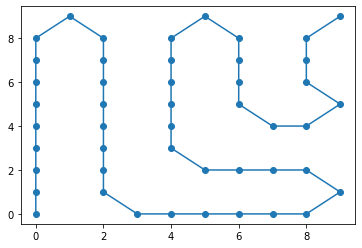

In [25]:
rows = [location[0] for location in path_dfs]
cols = [location[1] for location in path_dfs]
plt.plot(rows, cols, 'o-');

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


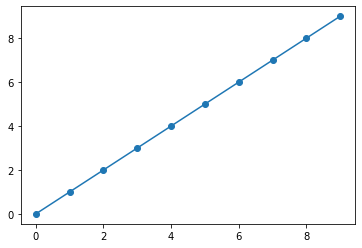

In [26]:
path_bfs = breadth_first_search((0, 0), (9, 9), grid_successors)
print(path_bfs)
rows = [location[0] for location in path_bfs]
cols = [location[1] for location in path_bfs]
plt.plot(rows, cols, 'o-');

In [27]:
depth_first_search((0, 0), (9, 20), grid_successors)

'Goal not found'

# Required Modification to the Grid Puzzle (worth 20 points)

Define a new function named `grid_successors_center_block` by copying the above `grid_successors` function and then modify it to add a square obstacle from coordinates (4, 4) to (6, 6).  Plot the path that results from doing breadth-first and depth-first searches with the start and goal states shown above.  Insert code cells and markdown cells here to do these steps.

In [28]:
def grid_successors_center_block(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:   #check each row
        for c in [-1, 0, 1]:  # check in each col
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  
                if 4<=newr<=6 and 4<=newc<=6:
                    continue
                succs.append( (newr, newc) )
    return succs

I just add a if statement to limit the path. Just skip the newr and newc if that are in the range, like greater than 4 and smller than 6.

In [29]:
print('Breadth first')
print('path from (0, 0) to (9, 9) is', breadth_first_search((0, 0), (9, 9), grid_successors_center_block))

Breadth first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (3, 6), (4, 7), (5, 7), (6, 7), (7, 7), (8, 8), (9, 9)]


In [30]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depth_first_search((0, 0), (9, 9), grid_successors_center_block))

Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 3), (7, 4), (7, 5), (7, 6), (6, 7), (5, 7), (4, 8), (5, 9), (6, 9), (7, 9), (8, 8), (9, 9)]


In [31]:

import matplotlib.pyplot as plt

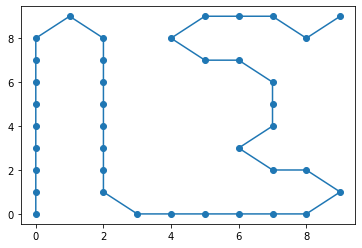

In [32]:
path_dfs = depth_first_search((0, 0), (9, 9), grid_successors_center_block)
path_dfs
rows = [location[0] for location in path_dfs]
cols = [location[1] for location in path_dfs]
plt.plot(rows, cols, 'o-');

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (3, 6), (4, 7), (5, 7), (6, 7), (7, 7), (8, 8), (9, 9)]


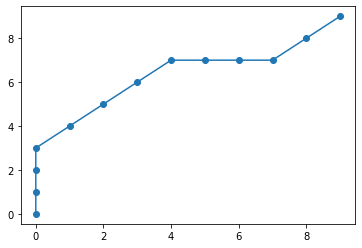

In [33]:
path_bfs = breadth_first_search((0, 0), (9, 9), grid_successors_center_block)
print(path_bfs)
rows = [location[0] for location in path_bfs]
cols = [location[1] for location in path_bfs]
plt.plot(rows, cols, 'o-');

In [34]:
depth_first_search((0, 0), (9, 20), grid_successors_center_block)

'Goal not found'


DFS in grid_successor that function tell us the normal way that we can use to achive the goals. That in grid_successors_center_block not working because we have a barrier in (4,4) to (6,6), so we can see the paths around it to aviod that obstacle. The BFS in the grid_successors that tell us the normal bfs pathes to achive the goal. However, in the grid_successors, there is a barrier between 4 to 6, so we have to aviod that obstacle in grid_successors_center_block function. I add a if statement to limit this, so the result I got avoid 4,4 to 6,6. That is a fatest bfs path to get goal wothout using (4,4)to (6,6).

# Extra Credit

For extra credit, use your functions to solve the Camels Puzzle, described at [Logic Puzzles](http://www.folj.com/puzzles/).
The following code illustrates one possible state representation and shows results of a breadth-first and a dept-first search.  You must define a new successors function, called `camel_successors_f`. 

If you do not do this extra credit step, please remove this and the following cells that pertain to this extra credit.

In [35]:
camel_start_state = ['R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L']

In [36]:
camel_goal_state = ['L', 'L', 'L', 'L', ' ', 'R', 'R', 'R', 'R']

In [37]:
def camel_successors_f(camel_start_state):
    empty = camel_start_state.index(' ')
    
    c1 = list(camel_start_state).copy()
    c2 = list(camel_start_state).copy()
    c3 = list(camel_start_state).copy()
    c4 = list(camel_start_state).copy()
    if(empty == 0):
        c1[empty+2],c1[empty] = c1[empty],c1[empty+2]
        return [tuple(c1)]
    elif(empty == 1):
        c1[empty-1],c1[empty] = c1[empty],c1[empty-1]
        c2[empty+1],c2[empty] = c2[empty],c2[empty+1]
        c3[empty+2],c3[empty] = c3[empty],c3[empty+2]
        return tuple(c1),tuple(c2),tuple(c3)
    elif(empty == 7):
        c1[empty-1],c1[empty] = c1[empty],c1[empty-1]
        c2[empty+1],c2[empty] = c2[empty],c2[empty+1]
        c3[empty-2],c3[empty] = c3[empty],c3[empty-2]
        return tuple(c3),tuple(c1),tuple(c2)
    elif(empty == 8):
        c1[empty-2],c1[empty] = c1[empty],c1[empty-2]
        return [tuple(c1)]
    
    else:
        c1[empty-1],c1[empty] = c1[empty],c1[empty-1]
        c2[empty+1],c2[empty] = c2[empty],c2[empty+1]
        c3[empty+2],c3[empty] = c3[empty],c3[empty+2]
        c4[empty-2],c4[empty] = c4[empty],c4[empty-2]
        return tuple(c4),tuple(c1),tuple(c2),tuple(c3)
    

A handy function for implementing `camel_successors_f` is `index` that returns the index where an element is found in a list or a tuple.

In [38]:
camel_start_state.index(' ')

4

In [39]:
children = camel_successors_f(camel_start_state)
print(children[0]) 
camel_successors_f(children[0])

('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L')


((' ', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', ' ', 'R', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L'))

In [40]:
def print_camel_state(state):
    return ''.join(state)

print_camel_state(camel_start_state)

'RRRR LLLL'

In [41]:
bfs = breadth_first_search(camel_start_state, camel_goal_state, camel_successors_f)
print(f'Breadth-first solution: ({len(bfs)} steps)')
for s in bfs:
    print(print_camel_state(s))

dfs = depth_first_search(camel_start_state, camel_goal_state, camel_successors_f)
print(f'Depth-first solution: ({len(dfs)} steps)')
for s in dfs:
     print(print_camel_state(s))


TypeError: unhashable type: 'list'

# Grading

Your notebook will be run and graded automatically. Download [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A1grader.tar)  and extract A1grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/80 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  In markdown cells, explain what your functions are doing and make observations about your results.  Also mention problems you encountered in trying to solve this assignment.

In [42]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'YiboXu-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Searching this graph:
 {'a': ['b'], 'b': ['c', 'd'], 'c': ['e'], 'd': ['f', 'i'], 'e': ['g', 'h', 'i']}

Looking for path from a to b.
  Calling breadth_first_search(a, b, successorsf)
       and depth_first_search(a, b, successorsf)

10/10 points. Your breadth_first_search found correct solution path of ['a', 'b']
10/10 points. Your depth_first_search found correct solution path of ['a', 'b']

Looking for path from a to i.
  Calling breadth_first_search(a, i, successorsf)
      and depth_first_search(a, i, successorsf)

20/20 points. Your breadth_first_search found correct solution path of ['a', 'b', 'd', 'i']
20/20 points. Your depth_first_search found correct solution path of ['a', 'b', 'c', 'e', 'i']

Looking for nonexistent path from a to denver